# Student Performance Prediction Project

This notebook uses various Python-based libraries to create different machine learning models to predict the grade of a student based on a number of factors.

## Data
The data that the model will be learning from and making predictions on was created by Rabie El Kharoua, and the dataset can be found on Kaggle.  
[Link to the dataset on Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download)

## Features
This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, `GradeClass`, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.  

### Dictionary:
* **Age**: The age of the students, ranging from 15 to 18 years.  
* **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.  
* **Ethnicity**: The ethnicity of the students, coded as follows:  
  * 0: Caucasian  
  * 1: African American  
  * 2: Asian  
  * 3: Other  
* **ParentalEducation**: The education level of the parents, coded as follows:  
  * 0: None  
  * 1: High School  
  * 2: Some College  
  * 3: Bachelor's  
  * 4: Higher  
* **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.  
* **Absences**: Number of absences during the school year, ranging from 0 to 30.  
* **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.  
* **ParentalSupport**: The level of parental support, coded as follows:  
  * 0: None  
  * 1: Low  
  * 2: Moderate  
  * 3: High  
  * 4: Very High  
* **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.  
* **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.  
* **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.  
* **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.  
* **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.  

#### Target Variable: Grade Class
* **GradeClass**: Classification of students' grades based on GPA:  
  * 0: 'A' (GPA >= 3.5)  
  * 1: 'B' (3.0 <= GPA < 3.5)  
  * 2: 'C' (2.5 <= GPA < 3.0)  
  * 3: 'D' (2.0 <= GPA < 2.5)  
  * 4: 'F' (GPA < 2.0)

### Machine Learning Models Used:
* **RandomForestRegressor()**  
* **K-Nearest Neighbors (KNN)**  
* **Support Vector Machine (SVM) with Linear Kernel**


## Tools Used
Pandas, NumPy, Matplotlib and Scikit-Learn libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

## 1. Load and View Data

In [2]:
data = pd.read_csv("Student_performance_data.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
data.shape

(2392, 15)

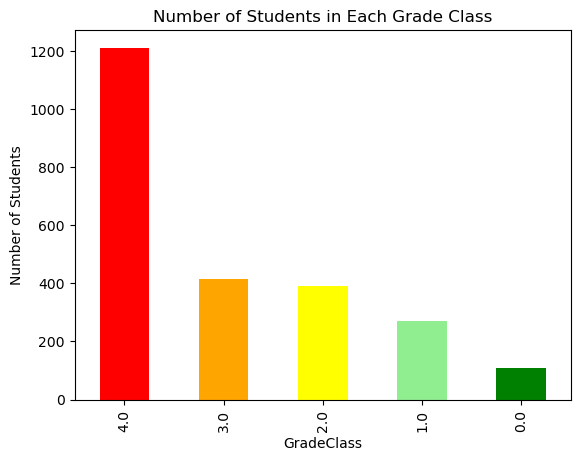

In [5]:
data["GradeClass"].value_counts().plot(kind="bar", color=["red", "orange", "yellow", "lightgreen", "green"]);
plt.title("Number of Students in Each Grade Class");
plt.ylabel("Number of Students");

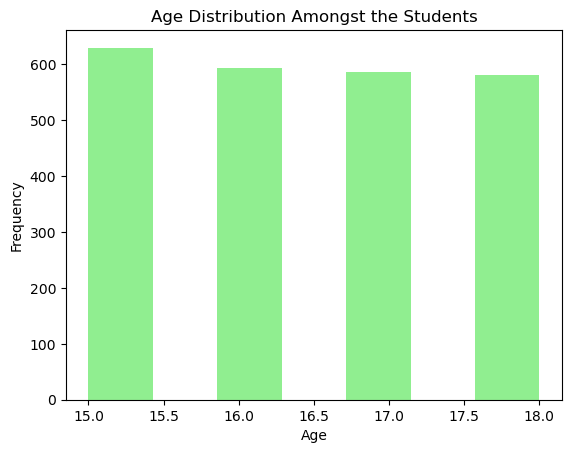

In [6]:
data.Age.plot.hist(bins=7, color="lightgreen");
plt.title("Age Distribution Amongst the Students");
plt.xlabel("Age");

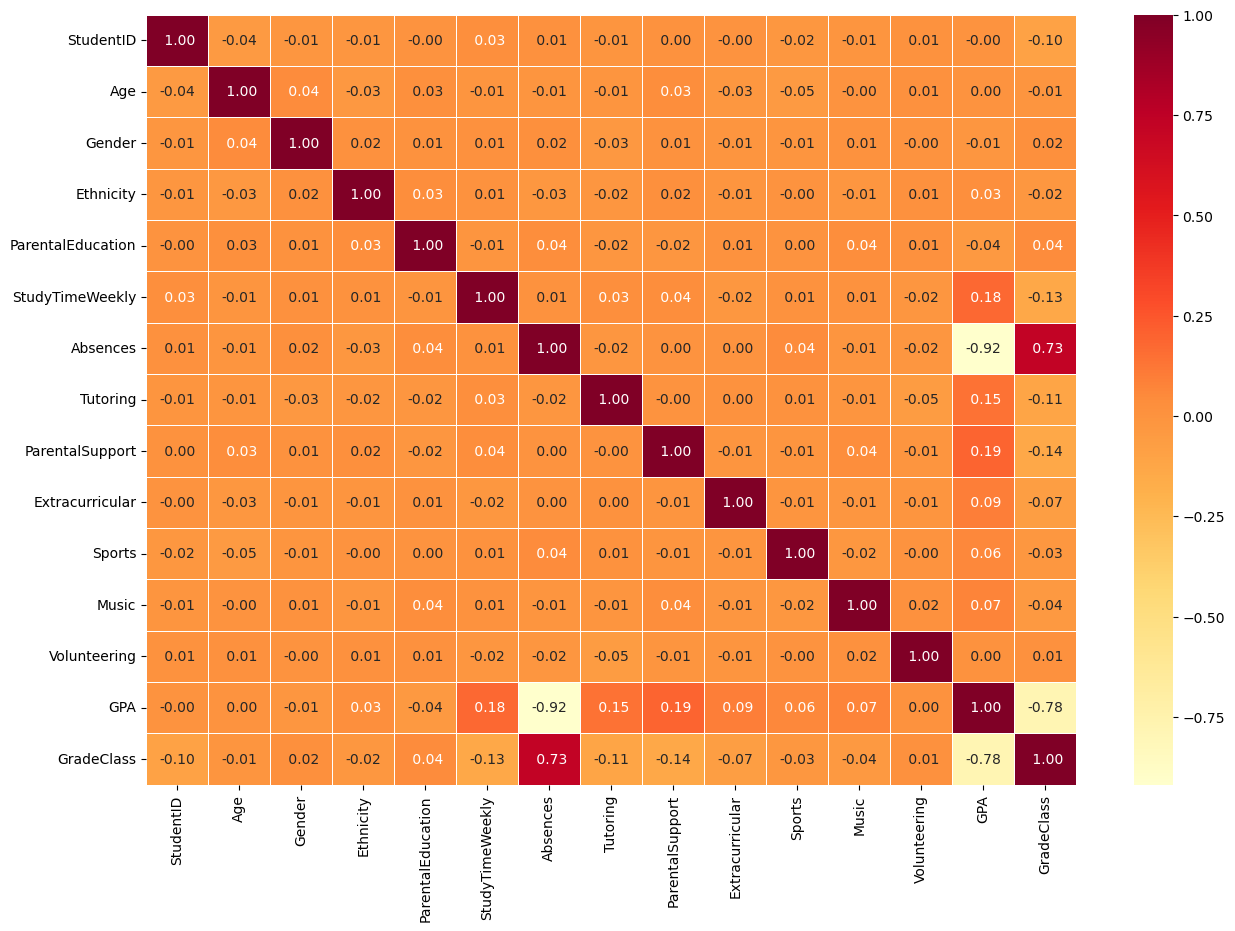

In [7]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=" .2f", cmap="YlOrRd");

## 2. Modelling Data

### Option 1: Predict Grade Class (Classification)

In [8]:
classification_models = {"RandomForest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier()}

In [9]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [10]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [11]:
X = data.drop(["StudentID", "GradeClass"], axis=1)
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [12]:
y = data["GradeClass"]
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [13]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classification_scores = fit_and_score(classification_models, X_train, X_test, y_train, y_test)
classification_scores

C:\Users\dever\Documents\sample_project_1\student_performance_prediction_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.9164345403899722,
 'Logistic Regression': 0.7298050139275766,
 'KNN': 0.692200557103064,
 'LinearSVC': 0.6309192200557103}

#### Model Comparison

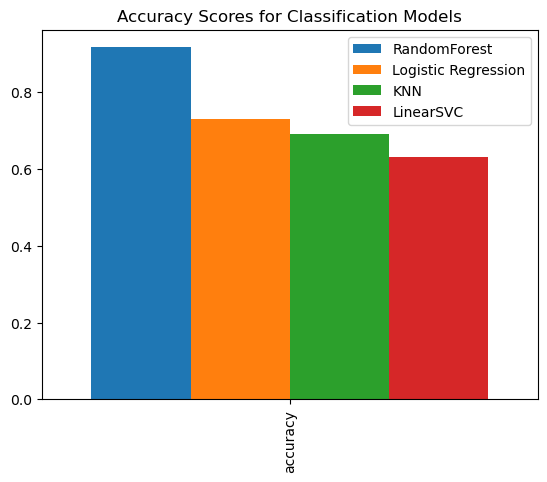

In [14]:
comparison = pd.DataFrame(classification_scores, index=["accuracy"])
comparison.plot.bar(width=2);
plt.title("Accuracy Scores for Classification Models");

#### Tuning RandomForestClassifier Model

In [15]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": ['sqrt', 'log2', None],  
           "max_leaf_nodes": [3, 6, 9]}


In [16]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': None}

In [18]:
classification_scores['RandomForest']

0.9164345403899722

In [19]:
rf.score(X_test, y_test)

0.9233983286908078

In [20]:
print(f"RandomForest Best Score: {rf.score(X_test,y_test)*100:.2f}%")

RandomForest Best Score: 92.34%


#### Tuning Logistic Regression Model

In [30]:
lr_grid ={'C' : np.logspace(-4,4,20),
          'solver':['liblinear', 'newton-cg']}

In [33]:
np.random.seed(42)
lr = RandomizedSearchCV(LogisticRegression(),
                  param_distributions = lr_grid,
                  n_iter=20,
                  cv = 5,
                  verbose=True)
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg']},
                   verbose=True)

In [34]:
lr.best_params_

{'solver': 'newton-cg', 'C': 11.288378916846883}

In [35]:
classification_scores["Logistic Regression"]

0.7298050139275766

In [36]:
lr.score(X_test, y_test)

0.7520891364902507

In [38]:
print(f"Logistic Regression Best Score: {lr.score(X_test,y_test)*100:.2f}%")

Logistic Regression Best Score: 75.21%


#### Tuning K-Nearest Neighbors Model

K-Nearest Neighbors Max Score: 70.06%


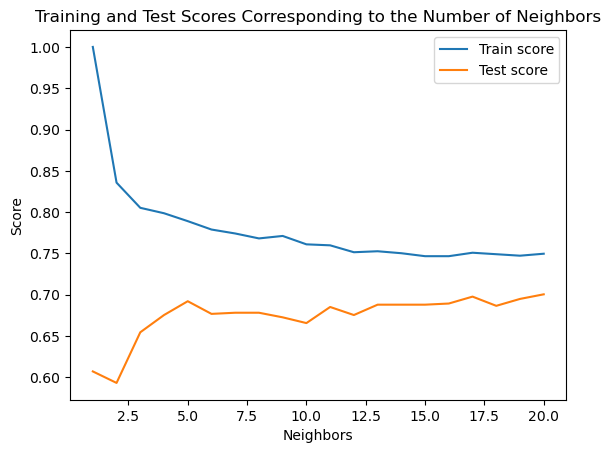

In [162]:
train_scores = []
test_scores = []

knn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
plt.plot(neighbors, train_scores, label="Train score");
plt.plot(neighbors, test_scores, label="Test score");
plt.xlabel('Neighbors');
plt.ylabel('Score');
plt.title('Training and Test Scores Corresponding to the Number of Neighbors')
plt.legend()
knn_max = max(test_scores) * 100
print(f"K-Nearest Neighbors Max Score: {knn_max:.2f}%")

#### Model Evaluation

### Option 2: Predict GPA (Regression)

In [ ]:
regression_models = {"RandomForest": RandomForestRegressor(),
          "Ridge": Ridge(),
          "SVR": svm.SVR(kernel='linear')}

In [ ]:
A = data.drop(["StudentID","GPA", "GradeClass"], axis=1)
A.head()

In [ ]:
b = data["GPA"]
b

In [ ]:
np.random.seed(42)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30)
regression_scores = fit_and_score(regression_models, A_train, A_test, b_train, b_test)
regression_scores

In [ ]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestRegressor(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rf.fit(X_train, y_train)